### **THE SPARKS FOUNDATION - DATA SCIENCE & BUSINESS ANALYTICS**

### **Author : Midhir Nambiar**

### **Task : Prediction using Supervised Machine Learning**

In this task we are required to predict the percentage of a student on the basis of the number of hours *of* study using the Linear Regression Supervised ML Algorithm.

### **IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **DATA ANALYSIS**

Reading and Viewing the Dataset

In [2]:
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


Shape of the Dataset

In [4]:
print(df.shape)

(25, 2)


Check for null values if any

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Viewing column headings

In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

Information about the Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Description about the Dataset

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **DATA VISULAISATION - I**

**Plot of Hours V Percentage Score**

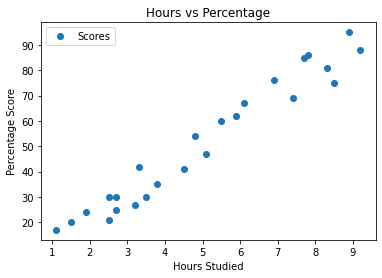

In [39]:
df.plot(x ='Hours', y ='Scores',style = 'o')
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**Observation : There is a linear relationship between ' Number of hours' and 'Score'. So we can use the Linear Regression Supervised ML model on it to predict further.**

Co-relation of the data

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Heatmap of the data**

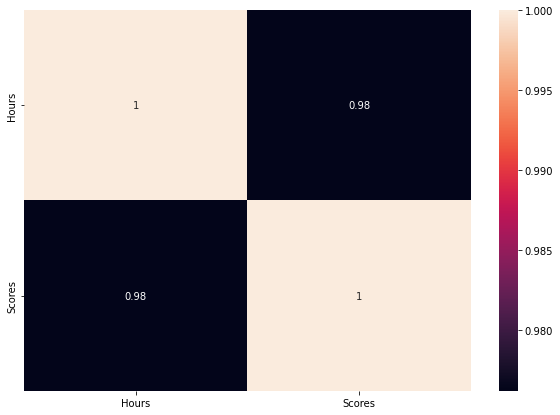

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot = True)
plt.show()

### **DATA PREPROCESSING**

Pre-processing the data

In [12]:
x = df.iloc[: , :1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y = df.iloc[: , 1:].values
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

Splitting the data into train and test

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

### **MODEL TRAINING**

Train our model

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)
print('-----Training Completed-----')

-----Training Completed-----


**Regressor Line Concept**

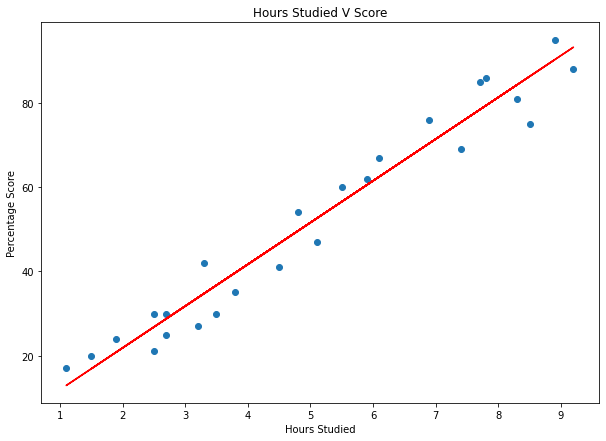

In [33]:
plt.figure(figsize=(10,7))
line = model.coef_*x + model.intercept_
plt.scatter(x, y)
plt.title('Hours Studied V Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.plot(x, line , label = 'Line of best fit' , color = 'r')
plt.show()


### **MAKING A PREDICTION**

Prediction

In [17]:
y_pred = model.predict(x_test)

Accuracy of the model on our test data

In [18]:
print('Accuracy of the model :', model.score(x_test , y_test)*100)

Accuracy of the model : 94.54906892105353


### **COMPARING ACTUAL AND PREDICTED VALUES**

Actual Values

In [19]:
actual = print('Actual :' , y_test)

Actual : [[20]
 [27]
 [69]
 [30]
 [62]]


Predicted Values

In [20]:
predicted = print('Predicted :',y_pred)

Predicted : [[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


Train and Test Score

In [21]:
print("Training Score:", model.score(x_train,y_train)*100)
print("Testing Score: ", model.score(x_test,y_test)*100)

Training Score: 95.15510725211553
Testing Score:  94.54906892105353


### **DATA VISUALISATION - II**

**Plot of Hours V Score on the Train data**

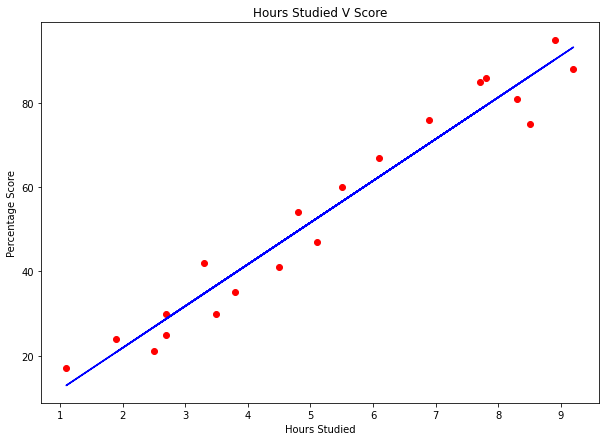

In [32]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.title('Hours Studied V Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**Plot of Hours V Score on the Test data**

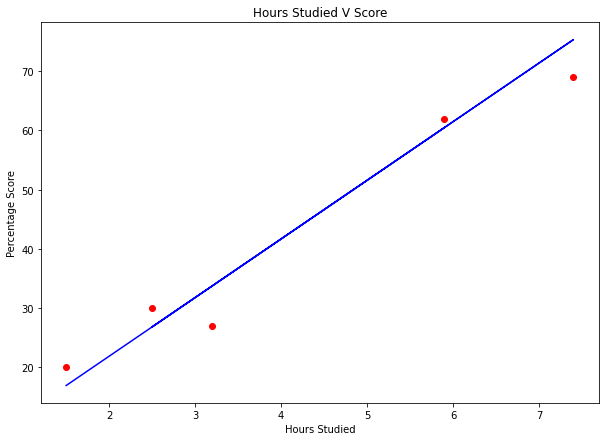

In [31]:
plt.figure(figsize=(10,7))
plt.scatter(x_test,y_test,color='red');
plt.plot(x_test,y_pred,color='blue')
plt.title('Hours Studied V Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### **PREDICT THE SCORE IF A STUDENT STUDIES FOR 9.25HRS**

In [24]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print()
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25

Predicted Score = [93.69173249]


### **EVALUATION OF OUR MODEL**

Evaluation by calculating the mean squared error

In [25]:
from sklearn import metrics
print('Mean Absolute Error :' , metrics.mean_absolute_error(y_test , y_pred))

Mean Absolute Error : 4.183859899002982


**Conclusion :  If a student studies for about 9.25hrs , his/her predicted percentage score would be about 93.69**




### **THANK YOU**